In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [3]:
sns.set_theme(style="whitegrid", palette='Pastel1')

In [4]:
df = pd.read_csv('./tables/opfs_running_time_comparison.csv')
df.head()

,Evaluation,Dataset,Size,Running time,Recognition Rate,OPF version,max k
0,V-measure,BCW,569,12.219462,0.557642,OPF_knn,19
1,V-measure,BCW,569,0.842401,0.557642,OPF_kdtree,19
2,V-measure,BCW,569,0.708110,0.536349,OPF_annoy,19
3,V-measure,BCW,569,1.181412,0.458052,OPF_hnsw,19
4,V-measure,Blood,748,36.594275,0.075390,OPF_knn,47


<AxesSubplot:xlabel='OPF version', ylabel='Running time'>

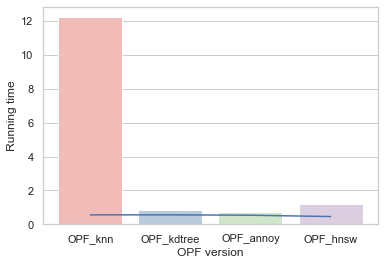

In [108]:
df_bcw = df[df['Dataset'] == 'BCW']
sns.set_theme(style="whitegrid")
sns.barplot(data=df_bcw, x='OPF version', y='Running time', palette="Pastel1")
sns.lineplot(data=df_bcw, x="OPF version", y="Recognition Rate", markers=True, dashes=False)

<AxesSubplot:xlabel='OPF version', ylabel='Running time'>

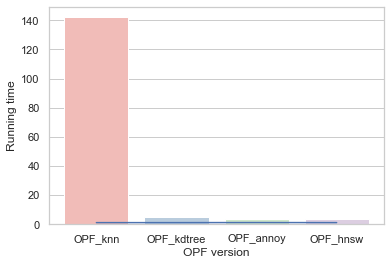

In [56]:
df_frogs = df[df['Dataset'] == 'Frogs']
ax = sns.barplot(data=df_frogs, x='OPF version', y='Running time', palette="Pastel1")
sns.lineplot(data=df_frogs, x="OPF version", y="Recognition Rate", markers=True, dashes=False)

<AxesSubplot:xlabel='OPF version', ylabel='Running time'>

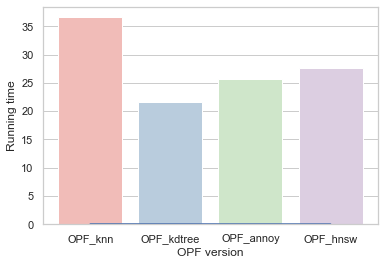

In [57]:
df_blood = df[df['Dataset'] == 'Blood']
sns.barplot(data=df_blood, x='OPF version', y="Running time", palette="Pastel1")
sns.lineplot(data=df_blood, x="OPF version", y="Recognition Rate", markers=True, dashes=False)

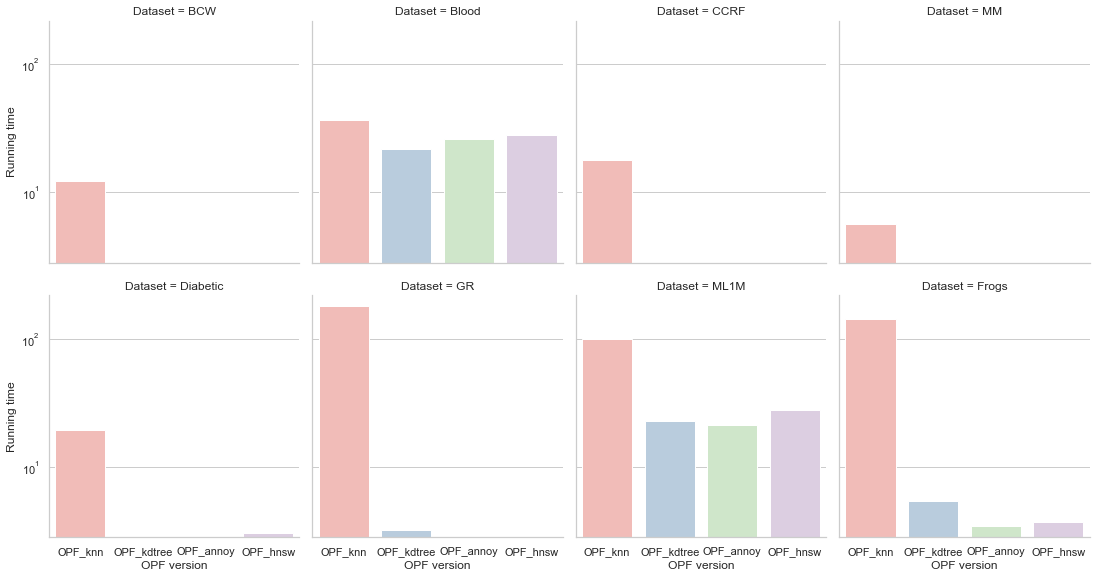

In [104]:
g = sns.catplot(kind="bar", data=df, x="OPF version", y="Running time", col="Dataset", 
                col_wrap=4, height=4, aspect=.95, palette='Pastel1')
g.set(yscale='log')

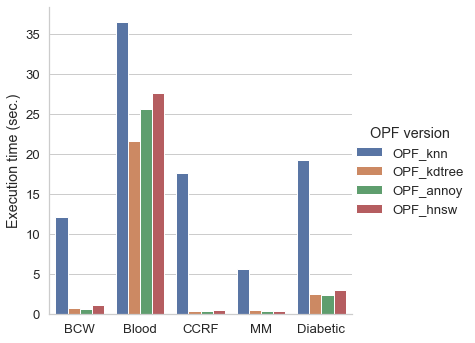

In [55]:
g = sns.catplot(kind='bar', data=df[df['Evaluation'] == 'V-measure'], x='Dataset', y='Running time', hue='OPF version')
g.set_axis_labels('', 'Execution time (sec.)')
plt.show()

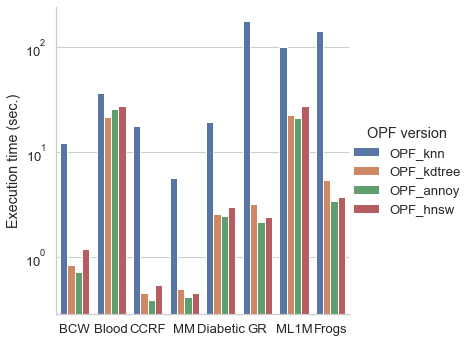

In [9]:
sns.set_theme(style="whitegrid", font_scale=1.2)
g = sns.catplot(kind='bar', data=df, x='Dataset', y='Running time', hue='OPF version')
g.set_axis_labels('', 'Execution time (sec.)')
g.set(yscale='log')
plt.show()

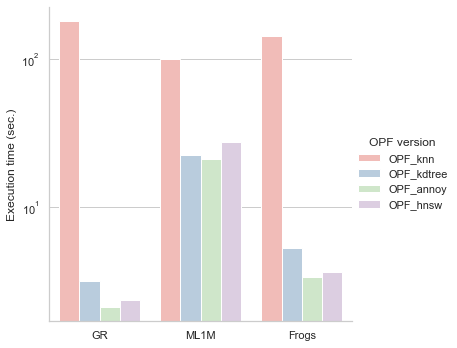

In [5]:
g = sns.catplot(kind='bar', data=df[df['Evaluation'] == 'DB-index'], x='Dataset', y='Running time', hue='OPF version')
g.set_axis_labels('', 'Execution time (sec.)')
g.set(yscale='log')
plt.show()

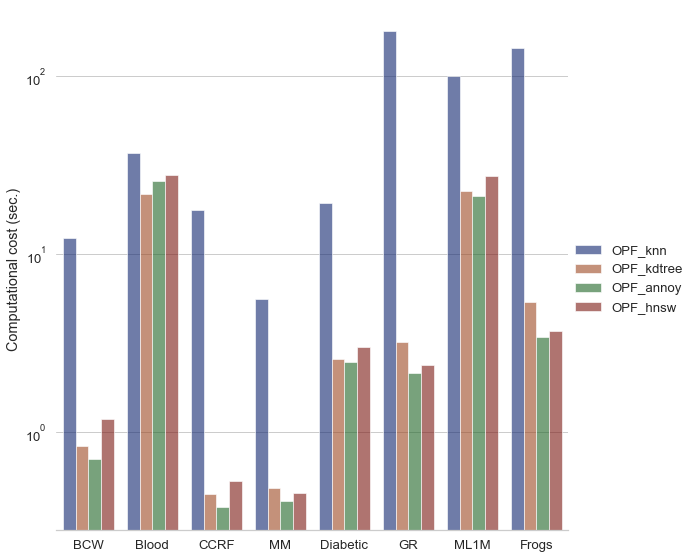

In [10]:
sns.set_theme(style="whitegrid", font_scale=1.2)
g = sns.catplot(kind="bar", 
            data=df, 
            x="Dataset", 
            y="Running time", 
            hue="OPF version", 
            ci="sd", 
            palette="dark", alpha=.6, height=8)

g.despine(left=True)
g.set_axis_labels("", "Computational cost (sec.)")
g.set(yscale='log')
g.legend.set_title("")

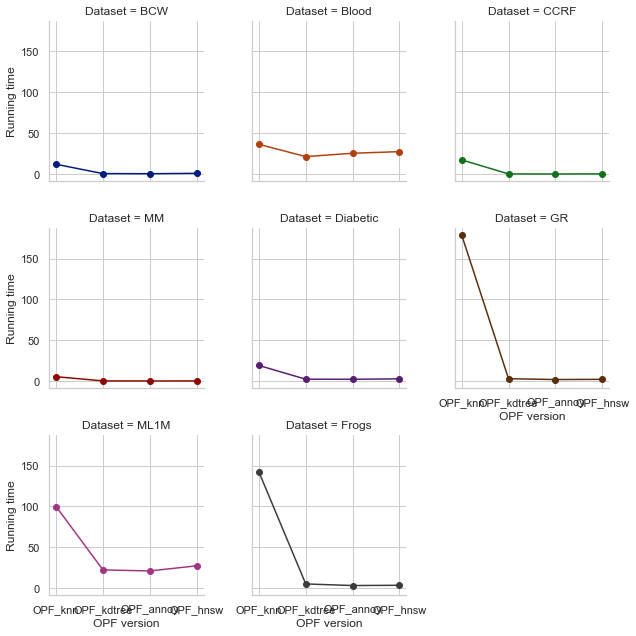

In [121]:
sns.set_theme(style="whitegrid")

# Initialize a grid of plots with an Axes for each walk
grid = sns.FacetGrid(data=df, col="Dataset", hue="Dataset", palette="dark", col_wrap=3, height=3)

# Draw a line plot to show the trajectory of each random walk
grid.map(plt.plot, "OPF version", "Running time", marker="o")

# Adjust the arrangement of the plots
grid.fig.tight_layout(w_pad=1)